In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\New DA Project\customer_shopping_behavior.csv')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.shape

(3900, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [8]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [9]:
# --- 1. See Nulls per Category ---
# This is your first request: "see the category wise null value"
# Run this line in your Colab cell:
print("\n--- Step 1: Null 'Review Rating' Count by Category ---")
nulls_by_category = df.groupby('Category')['Review Rating'].apply(lambda x: x.isnull().sum())
print(nulls_by_category)
print("-" * 40)


--- Step 1: Null 'Review Rating' Count by Category ---
Category
Accessories    11
Clothing       19
Footwear        5
Outerwear       2
Name: Review Rating, dtype: int64
----------------------------------------


In [10]:
# --- 2. See Median per Category ---
# This is your second request: "see their category median"
# Run this line in your Colab cell:
print("\n--- Step 2: Median 'Review Rating' by Category ---")
median_by_category = df.groupby('Category')['Review Rating'].median()
print(median_by_category)
print("-" * 40)



--- Step 2: Median 'Review Rating' by Category ---
Category
Accessories    3.8
Clothing       3.7
Footwear       3.8
Outerwear      3.8
Name: Review Rating, dtype: float64
----------------------------------------


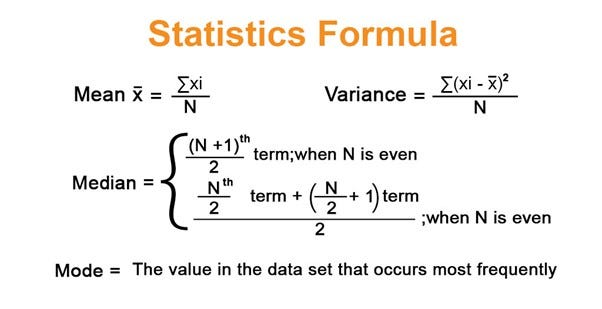

In [12]:
# --- 3. Fill Nulls using Category Median ---
# This is your third request: "fill the values"
#
# We use .transform('median') to create a new Series that has the
# *same length* as the original DataFrame. Each row in this new Series
# will contain the median of its respective category.
print("\n--- Step 3: Filling nulls with category-specific median ---")

# Create the Series of medians aligned with the original index
category_medians = df.groupby('Category')['Review Rating'].transform('median')

# Now, use this new Series to fill the NaNs in the original column.
# This line modifies your DataFrame 'df' in place.
df['Review Rating'] = df['Review Rating'].fillna(category_medians)

print("Fill complete.")
print("-" * 40)



--- Step 3: Filling nulls with category-specific median ---
Fill complete.
----------------------------------------


In [13]:
# --- 4. Verification ---
# Run this line to confirm the nulls are gone
print("\n--- Step 4: Verification (After Filling) ---")
print(f"Total nulls in 'Review Rating' (After): {df['Review Rating'].isnull().sum()}")

# You can also print the head of the DataFrame to see the filled values
# print(df.head())


--- Step 4: Verification (After Filling) ---
Total nulls in 'Review Rating' (After): 0


In [14]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase amount (usd)   3900 non-null   int64  
 6   location                3900 non-null   object 
 7   size                    3900 non-null   object 
 8   color                   3900 non-null   object 
 9   season                  3900 non-null   object 
 10  review rating           3900 non-null   float64
 11  subscription status     3900 non-null   object 
 12  shipping type           3900 non-null   object 
 13  discount applied        3900 non-null   object 
 14  promo code used         3900 non-null   

In [17]:
df.columns = df.columns.str.replace(' ','_')

In [18]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [19]:
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [20]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

This text called Sneak Caseing

**Feature Engineering**

In [23]:
# Create a column age_group
labels = ['Young Adult','Adult','Middle-aged','Senior']
df['age_group'] = pd.qcut(df['age'],q=4,labels= labels)

In [24]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [25]:
df['frequency_of_purchases'].head()

0    Fortnightly
1    Fortnightly
2         Weekly
3         Weekly
4       Annually
Name: frequency_of_purchases, dtype: object

In [26]:
print("--- Unique values in 'frequency_of_purchases' ---")
unique_items = df['frequency_of_purchases'].unique()
print(unique_items)

--- Unique values in 'frequency_of_purchases' ---
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [27]:
# --- 2. To see *how many* unique values there are ---
# This returns an integer count
print("\n--- Number of unique values ---")
count_of_unique = df['frequency_of_purchases'].nunique()
print(count_of_unique)


--- Number of unique values ---
7


In [28]:
# --- 3. (Optional) To see the counts for each unique value ---
# This is also very useful and often the next step.
print("\n--- Counts for each unique value ---")
value_counts = df['frequency_of_purchases'].value_counts()
print(value_counts)


--- Counts for each unique value ---
frequency_of_purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [29]:
# Create column purchase_frequency_days
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [30]:
df['purchase_frequency_days'].head()

0     14
1     14
2      7
3      7
4    365
Name: purchase_frequency_days, dtype: int64

So, Finally we convert our data to number by using the map function

In [32]:
df[['frequency_of_purchases','purchase_frequency_days']].head(10)

,frequency_of_purchases,purchase_frequency_days
0,Fortnightly,14
1,Fortnightly,14
2,Weekly,7
3,Weekly,7
4,Annually,365
5,Weekly,7
6,Quarterly,90
7,Weekly,7
8,Annually,365
9,Quarterly,90


In [33]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-aged,365


In [34]:
df[['discount_applied','promo_code_used']].head()

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes


So, Here we can see that both the columns look like similar like if somebody get's the discount it means that guy use the promocode so now we need to check is there is diff values or not see the below code

In [36]:
(df['discount_applied'] == df['promo_code_used']).all()

True

It means all have the same values now we are going to drop the column 'promo_code_used'




In [38]:
df = df.drop('promo_code_used',axis=1)

In [39]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

# Now we are going to connect this with MYSQL

In [41]:
!pip install pyodbc sqlalchemy

Defaulting to user installation because normal site-packages is not writeable


In [79]:
df.shape

(3900, 19)

In [81]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

username = "root"
password = "S%40udi3011"   # encode @ as %40
host = "localhost"
port = "3306"
database = "customer_shoping"

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}",
    echo=True
)

# Write DataFrame to MySQL
table_name = "final_customer"
df.to_sql(table_name, engine, if_exists="replace", index=False)

# No of rows inserted
result = df.to_sql(table_name, engine, if_exists="replace", index=False)
print("Rows inserted:", result)

2025-11-16 12:27:09,229 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2025-11-16 12:27:09,229 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-16 12:27:09,238 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2025-11-16 12:27:09,240 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-16 12:27:09,244 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2025-11-16 12:27:09,245 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-16 12:27:09,248 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-16 12:27:09,266 INFO sqlalchemy.engine.Engine DESCRIBE `customer_shoping`.`final_customer`
2025-11-16 12:27:09,266 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-16 12:27:09,280 INFO sqlalchemy.engine.Engine 
CREATE TABLE final_customer (
	customer_id BIGINT, 
	age BIGINT, 
	gender TEXT, 
	item_purchased TEXT, 
	category TEXT, 
	purchase_amount BIGINT, 
	location TEXT, 
	size TEXT, 
	color TEXT, 
	season TEXT, 
	review_rating FLOAT(53), 
	subscription_status TEXT, 
	shipping_type T